In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_parquet("../data/raw/iot_inhaler/inhaler_events.parquet", engine="pyarrow")
df.head(10)

,patient_id,timestamp,puffs,latitude,longitude,device_type,date
0,AZ-0003-CAT,2024-01-01 00:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
1,AZ-0003-CAT,2024-01-01 01:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
2,AZ-0003-CAT,2024-01-01 02:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
3,AZ-0003-CAT,2024-01-01 03:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
4,AZ-0003-CAT,2024-01-01 04:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
5,AZ-0003-CAT,2024-01-01 05:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
6,AZ-0003-CAT,2024-01-01 06:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
7,AZ-0003-CAT,2024-01-01 07:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
8,AZ-0003-CAT,2024-01-01 08:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01
9,AZ-0003-CAT,2024-01-01 09:00:00+01:00,0,41.381738,2.175611,Symbicort Turbuhaler,2024-01-01


In [15]:
df_patient = df[df['patient_id'] == "AZ-0000-CAT"].iloc[:1]
df_patient

,patient_id,timestamp,puffs,latitude,longitude,device_type,date
6216,AZ-0000-CAT,2024-01-01 00:00:00+01:00,0,41.384737,2.175269,Symbicort Turbuhaler,2024-01-01


In [7]:
df.groupby(['patient_id', 'date'])['puffs'].sum()

/tmp/ipykernel_1054/2612988230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['patient_id', 'date'])['puffs'].sum()


patient_id   date      
AZ-0000-CAT  2024-01-01     7
             2024-01-02    11
             2024-01-03     8
             2024-01-04     7
             2024-01-05    15
                           ..
AZ-0999-CAT  2024-12-26    23
             2024-12-27    30
             2024-12-28    32
             2024-12-29    29
             2024-12-30    31
Name: puffs, Length: 365000, dtype: int64

In [19]:
unique_locations = df.groupby('patient_id')['longitude'].unique()
len(unique_locations)

1000

### Patient locations

In [16]:
import folium
import pandas as pd

df_patient = df[df['patient_id'] == "AZ-0000-CAT"].iloc[:1]

# Crear mapa centrado en la ubicación del paciente
mapa = folium.Map(
    location=[df["latitude"].iloc[0], df["longitude"].iloc[0]], 
    zoom_start=15
)

# Agregar marcadores para cada registro
for _, row in df_patient.iterrows():
    popup_text = f"""
    Paciente: {row['patient_id']}<br>
    Fecha/hora: {row['timestamp']}<br>
    Puffs: {row['puffs']}<br>
    Dispositivo: {row['device_type']}
    """
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=popup_text,
        icon=folium.Icon(icon="medical-icon", prefix="fa")  # Icono médico
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa

<Axes: xlabel='age'>

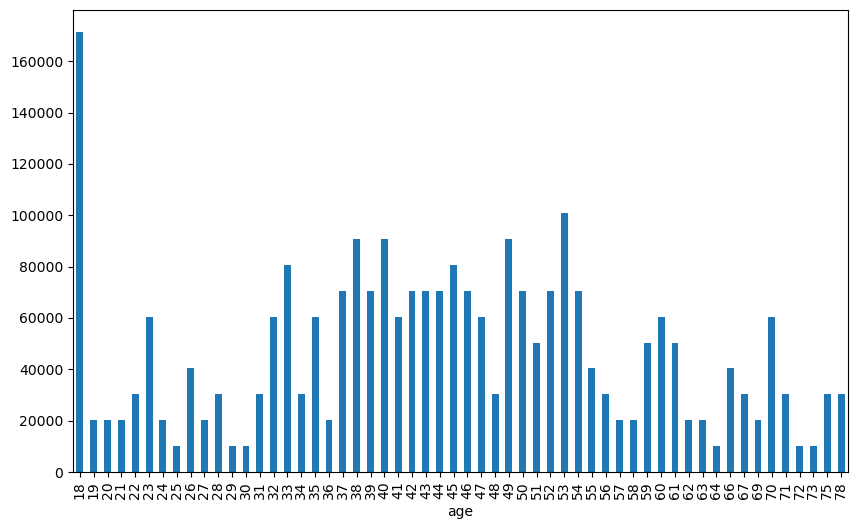

In [ ]:
plt.figure(figsize=(10, 6))
df['age'].value_counts().sort_index().plot(kind='bar')

In [ ]:
print(df['puffs'].value_counts(normalize=True) * 100)

puffs
0    70.272829
1    24.640107
2     4.471893
3     0.556340
4     0.054138
5     0.004311
6     0.000382
Name: proportion, dtype: float64


In [ ]:
df.head()

,timestamp,district,puffs,age,gender,smoker,NO2 (µg/m³),PM2.5 (µg/m³),O3 (µg/m³),longitude,latitude,patient_id
0,2024-01-01 00:00:00,Eixample,0,70,M,0,54.0,30.0,8.0,2.164220,41.391358,PAT_0000
1,2024-01-01 01:00:00,Eixample,0,70,M,0,65.0,34.0,5.0,2.164526,41.391564,PAT_0000
2,2024-01-01 02:00:00,Eixample,0,70,M,0,61.0,24.0,10.0,2.162434,41.390931,PAT_0000
3,2024-01-01 03:00:00,Eixample,0,70,M,0,61.0,21.0,6.0,2.164450,41.391265,PAT_0000
4,2024-01-01 04:00:00,Eixample,1,70,M,0,67.0,25.0,2.0,2.163835,41.390061,PAT_0000


<Axes: xlabel='age'>

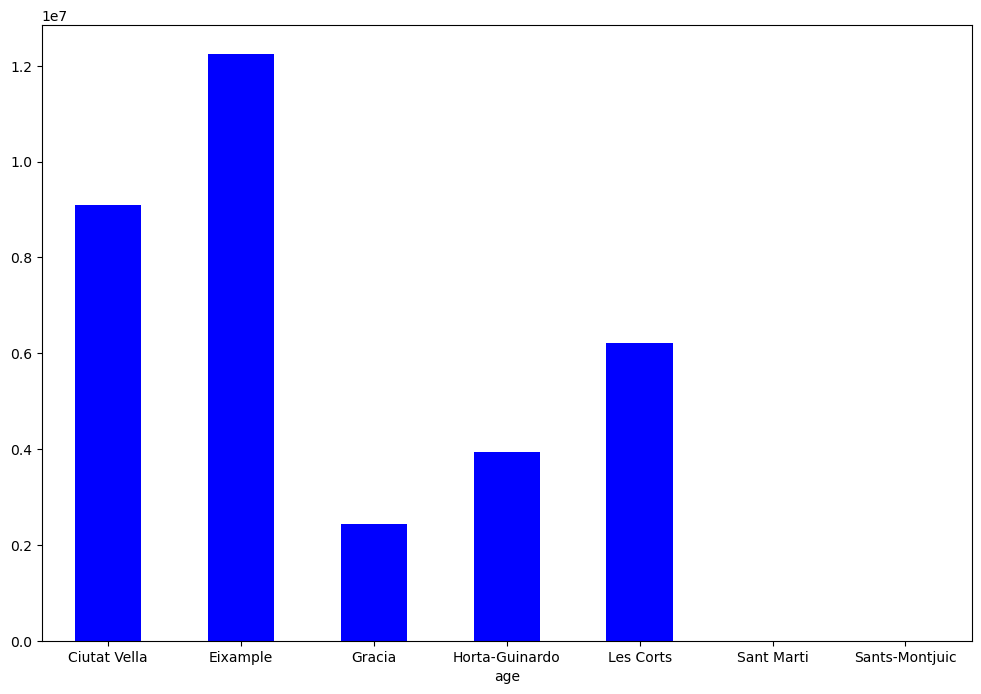

In [ ]:
df['day'] = df['timestamp'].dt.date
df_grouped_a = df.groupby('district')['O3 (µg/m³)'].sum()
df_grouped_b = df[df['patient_id'] == 'PAT_0009'].groupby('age')['puffs'].sum()

plt.figure(figsize=(12,8))
df_grouped_a.plot(kind='bar', color='blue')
df_grouped_b.plot(color='orange')

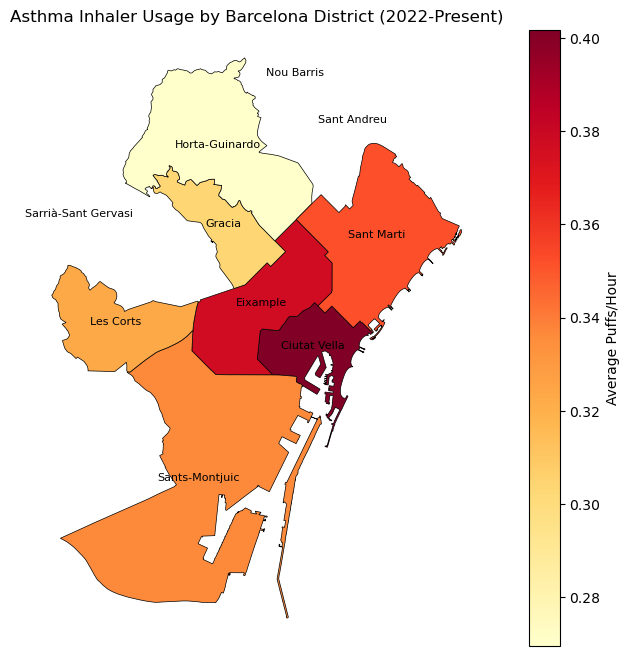

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

path = "../data/raw/geodata_barcelona_districts/BarcelonaCiutat_Districtes.csv"

# 1. Load district data from CSV
districts = pd.read_csv(path)

# Convert WGS84 geometry strings to actual geometries
districts['geometry'] = districts['geometria_wgs84'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(districts, geometry='geometry', crs='EPSG:4326')

# 2. Prepare your inhaler data (example aggregation)
district_stats = df.groupby('district').agg(
    avg_puffs=('puffs', 'mean'),
    avg_no2=('NO2 (µg/m³)', 'mean')
).reset_index()

# 3. Merge with district geometries
name_mapping = {
    'Sants-Montjuïc': 'Sants-Montjuic',
    'Sant Martí': 'Sant Marti',
    'Horta-Guinardó': 'Horta-Guinardo',
    'Gràcia': 'Gracia'
}

gdf['district'] = gdf['nom_districte'].replace(name_mapping)

merged = gdf.merge(
    district_stats,
    on='district',
    how='left'
)

# 4. Create simple visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot districts colored by average puffs
merged.plot(
    column='avg_puffs',
    legend=True,
    ax=ax,
    legend_kwds={'label': "Average Puffs/Hour"},
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=0.5
)

# Add labels
for idx, row in merged.iterrows():
    ax.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        row['district'],
        fontsize=8,
        ha='center'
    )

plt.title("Asthma Inhaler Usage by Barcelona District (2022-Present)")
plt.axis('off')
plt.show()